In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DOWNLOAD BIRD SONGS
A script to download bird sound files from the www.xeno-canto.org archives with metadata
The program downloads all the files found with the search terms into subdirectory data/xeno-canto-dataset/searchTerm with corresponding json files.


In [ ]:
import urllib.request, json
import sys
import os

savePath="../data/xeno-canto-dataset-full-all-Countries/"

## Defining necessary functions
* Creates the subdirectory data/xeno-canto-dataset if necessary
* Downloads and saves json files for number of pages in a query
* and directory path to saved json's

In [ ]:
def save_json(searchTerms, birdName, country):
    numPages = 1
    page = 1
    # create a path to save json files and recordings
    path = savePath + birdName.replace(':', '') + "/" + country
    if not os.path.exists(path):
        print("Creating subdirectory " + path + " for downloaded files...")
        os.makedirs(path)
        # download a json file for every page found in a query
    while page < numPages + 1:
        print("Loading page " + str(page) + "...")
        url = 'https://www.xeno-canto.org/api/2/recordings?query={0}&page={1}'.format(searchTerms.replace(' ', '%20'),
                                                                                      page)
        print(url)
        jsonPage = urllib.request.urlopen(url)
        jsondata = json.loads(jsonPage.read().decode('utf-8'))
        filename = path + "/jsondata_p" + str(page) + ".json"
        with open(filename, 'w') as outfile:
            json.dump(jsondata, outfile)
        # check number of pages
        numPages = jsondata['numPages']
        page = page + 1
    print("Found ", numPages, " pages in total.")
    # return number of files in json
    # each page contains 500 results, the last page can have less than 500 records
    print("Saved json for ", (numPages - 1) * 500 + len(jsondata['recordings']), " files")
    return path


# reads the json and return the list of values for selected json part
# i.e. "id" - ID number, "type": type of the bird sound such as call or song
# for all Xeno Canto files found with the given search terms.
def read_data(searchTerm, path):
    data = []
    numPages = 1
    page = 1
    # read all pages and save results in a list
    while page < numPages + 1:
        # read file
        with open(path + "/jsondata_p" + str(page) + ".json", 'r') as jsonfile:
            jsondata = jsonfile.read()
        jsondata = json.loads(jsondata)
        # check number of pages
        numPages = jsondata['numPages']
        # find "recordings" in a json and save a list with a search term
        for k in range(len(jsondata['recordings'])):
            data.append(jsondata["recordings"][k][searchTerm])
        page = page + 1
    return data


# downloads all sound files found with the search terms into xeno-canto directory
# into catalogue named after the search term (i.e. Apus apus)
# filename have two parts: the name of the bird in latin and ID number
def download(searchTerms, birdName, country):
    # create data/xeno-canto-dataset directory
    path = save_json(searchTerms, birdName, country)
    # get filenames: recording ID and bird name in latin from json
    filenamesID = read_data('id', path)
    filenamesCountry = read_data('cnt', path)
    # get website recording http download address from json
    fileaddress = read_data('file', path)
    numfiles = len(filenamesID)
    print("A total of ", numfiles, " files will be downloaded")
    for i in range(0, numfiles):
        print("Saving file ", i + 1, "/", numfiles,
              savePath + birdName.replace(':', '') + filenamesID[
                  i] + ".mp3")
        urllib.request.urlretrieve(fileaddress[i],
                                   path + "/" + birdName + filenamesID[i] + ".mp3")


## Download
Example download with all sounds type song, from bird list recorded in selected countries 

*example query*: query = "Dendrocopos major cnt:Poland type:song"
can be downloaded as:

download(query)

Other options can be specified according to xeno-canto query list
http://www.xeno-canto.org/explore?query=common+snipe

In [ ]:
countries = ['Germany']
birds = ['Dendrocopos major',
         'Chloris chloris',
         'Corvus frugilegus',
         'Coccothraustes coccothraustes',
         'Columba palumbus',
         'Delichon urbicum',
         'Apus apus',
         'Sitta europaea',
         'Corvus monedula',
         'Phoenicurus ochruros',
         'Turdus merula',
         'Turdus pilaris',
         'Passer montanus',
         'Phylloscopus trochilus',
         'Phylloscopus collybita']

for country in countries:
    for bird in birds:
        download(bird + ' cnt:' + country + ' type:song', bird.replace(' ', ''), country)
#for bird in birds:
#   download(bird + ' type:song', bird.replace(' ', ''), 'countries')

Creating subdirectory ../data/xeno-canto-dataset-full-all-Countries/Dendrocoposmajor/Germany for downloaded files...
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Dendrocopos%20major%20cnt:Germany%20type:song&page=1
Found  1  pages in total.
Saved json for  8  files
A total of  8  files will be downloaded
Saving file  1 / 8 ../data/xeno-canto-dataset-full-all-Countries/Dendrocoposmajor636855.mp3
Saving file  2 / 8 ../data/xeno-canto-dataset-full-all-Countries/Dendrocoposmajor627330.mp3
Saving file  3 / 8 ../data/xeno-canto-dataset-full-all-Countries/Dendrocoposmajor386014.mp3
Saving file  4 / 8 ../data/xeno-canto-dataset-full-all-Countries/Dendrocoposmajor380346.mp3
Saving file  5 / 8 ../data/xeno-canto-dataset-full-all-Countries/Dendrocoposmajor252314.mp3
Saving file  6 / 8 ../data/xeno-canto-dataset-full-all-Countries/Dendrocoposmajor412666.mp3
Saving file  7 / 8 ../data/xeno-canto-dataset-full-all-Countries/Dendrocoposmajor420318.mp3
Saving file  8 / 8 ../data/

In [ ]:
import shutil

# Set the source and destination paths

source_folder = '/content/drive/MyDrive/27_class/Non-Birds'  # Replace with the path to your source folder
destination_folder = '/data/Non-Birds'  # Replace with the path to your destination folder

# Move the folder
shutil.move(source_folder, destination_folder)


'/data/Non-Birds'

# DATASET PREPARTAION

## Create list of all files to cut

In [ ]:
%matplotlib inline
import matplotlib
matplotlib.interactive(False)
matplotlib.use('Agg')

import os
import gc

basePath = "../data/Non-Birds"
melsPath = "../data/NB"

birds = []  # list of all birds
for root, dirs, files in os.walk(basePath):
    if root == basePath:
        birds = dirs

birds50 = []
flist = []  # list of all files
blist = []  # list of files for one bird
i50 = 0

for i, bird in enumerate(birds):
    for root, dirs, files in os.walk(os.path.join(basePath, bird)):
        for file in files:
            if file.endswith((".mp3", ".wav")):
                blist.append(os.path.join(root, file))

    if len(blist) > 0:
        i50 = i50 + 1
        print(i50, ". Found", len(blist), 'files for', bird, '(', i + 1, ')')
        birds50.append(bird)
        flist.append(blist)

    blist = []

print(birds50)
print(root)


1 . Found 75 files for Cow ( 1 )
2 . Found 164 files for Cat ( 2 )
3 . Found 113 files for Dog ( 3 )
4 . Found 25 files for Donkey ( 4 )
['Cow', 'Cat', 'Dog', 'Donkey']
../data/Non-Birds/Donkey


## Find strategy to cut the file
We want to cut files to smaller pieces of the desired size (5 seconds in example), and stride of 1 second. Stride tells us how different pieces of files will overlap at each other.

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Function to convert audio file to Mel spectrogram
def convert_to_mel_spectrogram(audio_file, output_path):
    # Load audio file
    waveform, sample_rate = librosa.load(audio_file, sr=None)

    # Convert audio to Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    # Plot and save the Mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    
    # Resize the image to 600x600 pixels
    plt.gcf().canvas.draw()
    mel_spec_img = np.array(plt.gcf().canvas.renderer.buffer_rgba())
    mel_spec_img = Image.fromarray(mel_spec_img).resize((600, 600))

    # Save the resized Mel spectrogram image
    mel_spec_img.save(output_path)

    # Close the plot
    plt.close()

# Directory paths
input_directory = '../data/Non-Birds/Donkey'  # Specify the path to the directory containing WAV files
output_directory = '../data/M_Cow'  # Specify the path to the directory to save the Mel spectrograms

# Iterate through WAV files in the input directory
for file_name in os.listdir(input_directory):
    if file_name.endswith('.wav'):
        # Construct input and output file paths
        input_file_path = os.path.join(input_directory, file_name)
        output_file_path = os.path.join(output_directory, file_name.replace('.wav', '.png'))

        # Convert audio to Mel spectrogram and save
        convert_to_mel_spectrogram(input_file_path, output_file_path)


In [ ]:
def saveMel(signal, directory):
    gc.enable()
    # MK_spectrogram modified
    N_FFT = 1024         # 
    HOP_SIZE = 1024      #  
    N_MELS = 128          # Higher   
    WIN_SIZE = 1024      # 
    WINDOW_TYPE = 'hann' # 
    FEATURE = 'mel'      # 
    FMIN = 1400

    fig = plt.figure(1,frameon=False)
    fig.set_size_inches(6,6)

    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    S = librosa.feature.melspectrogram(y=signal, sr=sr,
                                        n_fft=N_FFT,
                                        hop_length=HOP_SIZE, 
                                        n_mels=N_MELS, 
                                        htk=True, 
                                        fmin=FMIN, # higher limit ##high-pass filter freq.
                                        fmax=sr/2) # AMPLITUDE
    librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN) #power = S**2

    fig.savefig(directory)
    plt.ioff()
    #plt.show(block=False)
    fig.clf()
    ax.cla()
    plt.clf()
    plt.close('all')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import sys
from tqdm import tqdm_notebook as tqdm
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

size = {'desired': 5, # [seconds]
        'minimum': 0, # [seconds]
        'stride' : 0, # [seconds]
        'name': 5 # [number of letters]
       } # stride should not be bigger than desired length

print('Number of directories to check and cut: ', len(flist))

#step = (size['desired']-size['stride'])*sr # length of step between two cuts in seconds
step=1
if step>0:
    for bird, birdList in enumerate(flist):
        print("Processing ",bird,'. ', birds50[bird], "...")
        for birdnr, path in tqdm(enumerate(birdList)):
            # load the mp3 file
            directory=melsPath+str(bird)+birds50[bird][:size['name']]+"/"

            if not os.path.exists(directory):
                os.makedirs(directory)
                
            if not os.path.exists(directory+path.rsplit('/',1)[1].replace(' ', '')[:-4]+"1_1.png"):
                  
                signal, sr = librosa.load(path) # sr = sampling rate
                step = (size['desired']-size['stride'])*sr # length of step between two cuts in seconds
                
                nr=0;
                for start, end in zip(range(0,len(signal),step),range(size['desired']*sr,len(signal),step)):
                    # cut file and save each piece
                    nr=nr+1
                    # save the file if its length is higher than minimum
                    if end-start > size['minimum']*sr:
                        melpath=path.rsplit('/',1)[1]
                        melpath=directory+melpath.replace(' ', '')[:-4]+str(nr)+"_"+str(nr)+".png"
                        saveMel(signal[start:end],melpath)
                    #print('New file...',start/sr,' - ',end/sr)
                    #print('Start: ',start,'end: ', end, 'length: ', end-start)
                
            pass
else:    
    print("Error: Stride should be lower than desired length.")
    
print('Number of files after cutting: ')

Number of directories to check and cut:  4
Processing  0 .  Cow ...


0it [00:00, ?it/s]

Processing  1 .  Cat ...


0it [00:00, ?it/s]

Processing  2 .  Dog ...


0it [00:00, ?it/s]

Processing  3 .  Donkey ...


0it [00:00, ?it/s]

Number of files after cutting: 


In [ ]:
# Test
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
ilist=[]
for root, dirs, files in os.walk(melsPath):
    print(dirs)
    for file in files:
        if file.endswith(".png"):
            ilist.append(os.path.join(root, file))
#img=mpimg.imread(ilist[100])
#imgplot = plt.imshow(img)
plt.show()
print("Found ",len(ilist)," files")

Found  0  files


# TRAINING & TEST DATA SPLIT

In [ ]:
import os

# define number of files for all sets
train = 0.7 # 80% of all sound should be in the train set
val = 0.15 # 10% validation set
test = 0.15 # 10% test set
kfolds = 1
basePath="../data/Non-Birds" # path with sound files. Can be downloaded with "AM_downloadData"
imPath = "../data/NB" # path with images (melspectrograms)
                                # Can be generated with "AM_prepareData" after downloading sound files
destPath = "../data/test/" # destination path - where the split dataset should be copied
                            # This folder will be used to train CNNs

# first find all of the mp3 files in the directory
birds=[] # list of all bird spiecies (Ember, Phyll...)
singleBirdList=[] # list of files for one bird
allFilesList=[] # list of all files for all birds. A list of singleBirdLists. 
for root, dirs, files in os.walk(basePath):
    if root == basePath:
        birds=dirs
print(birds)

trainSet=[]
testSet=[]
valSet=[]

birdsShort=[] # list of short file names
birdNumber=0
for nr,bird in enumerate(birds):
    for root, dirs, files in os.walk(basePath+bird):
        for file in files:
            if file.endswith(".mp3", ".wav"):
                singleBirdList.append(os.path.join(root, file))
    if len(singleBirdList) > 50:
        birdsShort.append(str(birdNumber)+bird[:5])
        birdNumber = birdNumber+1;
        print("Found ", len(singleBirdList), ' mp3 files for ', bird)
        trainSet.append(int(train*len(singleBirdList)))
        valSet.append(int(val*len(singleBirdList)))
        roundDiff = len(singleBirdList)-(int(train*len(singleBirdList))+int(test*len(singleBirdList))+int(val*len(singleBirdList))) 
        testSet.append(int(test*len(singleBirdList)) + roundDiff)
        print("Size of train: ", int(train*len(singleBirdList)),", val: ",int(val*len(singleBirdList)) ,", test: ",int(test*len(singleBirdList)))
        allFilesList.append(singleBirdList)
    singleBirdList=[]


print("train set: " + str(trainSet))
print("val set: " + str(valSet))
print("test set: " + str(testSet))

['Cow', 'Cat', 'Dog', 'Donkey']
train set: []
val set: []
test set: []


In [ ]:
# randomly choose mp3 files for each set  

from random import sample

trainFiles=[]
valFiles=[]
testFiles=[]

for index, singleBirdList in enumerate(allFilesList):
    randFiles = sample(range(len(singleBirdList)), len(singleBirdList))
    start = 0
    end = trainSet[index]
    trainFiles.append(randFiles[start:end])
    start = end 
    end = start + valSet[index]
    valFiles.append(randFiles[start:end])
    start = end 
    end = start + testSet[index] 
    testFiles.append(randFiles[start:end])
    print("Selected random files number:\n train: ", len(trainFiles[index]),"/",trainSet[index],
          ", val: ",len(valFiles[index]),"/",valSet[index],
          ", test: ",len(testFiles[index]),"/",testSet[index])

Selected random files number:
 train:  39 / 39 , val:  8 / 8 , test:  10 / 10
Selected random files number:
 train:  84 / 84 , val:  18 / 18 , test:  19 / 19
Selected random files number:
 train:  84 / 84 , val:  18 / 18 , test:  18 / 18
Selected random files number:
 train:  208 / 208 , val:  44 / 44 , test:  46 / 46
Selected random files number:
 train:  43 / 43 , val:  9 / 9 , test:  10 / 10
Selected random files number:
 train:  61 / 61 , val:  13 / 13 , test:  14 / 14
Selected random files number:
 train:  134 / 134 , val:  28 / 28 , test:  30 / 30
Selected random files number:
 train:  618 / 618 , val:  132 / 132 , test:  134 / 134


In [ ]:
def extractName(string):
    return string.rsplit('/',1)[1].replace(' ', '')[:-4]
# sort all the lists to make copying files easier
sets=[trainFiles,valFiles,testFiles]
for fileSet in sets:
    for index,files in enumerate(fileSet):
        fileSet[index].sort()
# change full names to short

for root, dirs, files in os.walk(basePath):
    if root == basePath:
        birds=dirs
#birdsShort=[]
#for bird in birds:
#    birdsShort.append(bird[:5])

setNames = ["train/","val/","test/"]

print("Long: ", birds,"\nShort: ",birdsShort)

Long:  ['Columbapalumbus', 'Sittaeuropaea', 'Turduspilaris', 'Chlorischloris', 'Coccothraustescoccothraustes', 'Apusapus', 'Corvusmonedula', 'Phylloscopuscollybita', 'Passermontanus', 'Phoenicurusochruros', 'Corvusfrugilegus', 'Phylloscopustrochilus', 'Dendrocoposmajor', 'Turdusmerula', 'Delichonurbicum'] 
Short:  ['0Colum', '1Sitta', '2Chlor', '3Phyll', '4Passe', '5Phoen', '6Phyll', '7Turdu']


In [ ]:
import shutil

counter=0
for birdNumber, bird in enumerate(birdsShort): # for each class (bird) check where the file should be copied
    print(counter)
    counter=0
    for setName, fileSet in zip(setNames, sets): # check for all datasets: train, val and test sests 
        for setNumber in fileSet[birdNumber]:
            
            for fileNumber, file in enumerate(allFilesList[birdNumber]):
                if setNumber == fileNumber: # if file number to copy is same as number of file, then copy it
                    
                    for root, dirs, files in os.walk(imPath):
                        for file2 in files:
                            if extractName(file) in file2:
                                counter=counter+1
                                source=root+"/"+file2
                                
                                destination = destPath+setName+bird+"/"
                                if not os.path.exists(destination):
                                    os.makedirs(destination)
                                shutil.copy2(source, destination)
                                #print(source, "   ->   ", destination)

0
912
2119
2213
0
3136
1928
3793


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(input_directory, train_directory, test_directory, test_size=0.2, random_state=42):
    # Create train and test directories if they don't exist
    os.makedirs(train_directory, exist_ok=True)
    os.makedirs(test_directory, exist_ok=True)

    # Get a list of all files in the input directory
    files = os.listdir(input_directory)

    # Split the dataset into train and test sets
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=random_state)

    # Move files to the train directory
    for file in train_files:
        src = os.path.join(input_directory, file)
        dst = os.path.join(train_directory, file)
        shutil.copy(src, dst)

    # Move files to the test directory
    for file in test_files:
        src = os.path.join(input_directory, file)
        dst = os.path.join(test_directory, file)
        shutil.copy(src, dst)

# Directory paths
input_directory = '../data/NB'  # Specify the path to the input directory containing dataset
train_directory = '../data/other_train'  # Specify the path to the train directory to save train set
test_directory = '../data/other_test'  # Specify the path to the test directory to save test set

# Split dataset into train and test sets
split_dataset(input_directory, train_directory, test_directory, test_size=0.2, random_state=42)


# MODEL TRAINING

## CNN Layers Initialization

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize and build the model
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(600, 600, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=7, activation='softmax'))
classifier.summary()
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 598, 598, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 299, 299, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 297, 297, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 700928)            0         
                                                                 
 dense (Dense)               (None, 128)               8

In [3]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/27_class/train',
                                                 target_size = (600, 600),
                                                 batch_size = 32,
                                                 class_mode = 'categorical', shuffle=True)

val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/27_class/test',
                                            target_size = (600, 600),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 9927 images belonging to 7 classes.
Found 2235 images belonging to 7 classes.


In [ ]:
# Fit the model to your data
classifier.fit_generator(training_set, 
                         epochs=5, 
                         validation_data = val_set)

<ipython-input-9-101a7f9ea169>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/5
311/311 [==============================] - 3106s 10s/step - loss: 1.4339 - accuracy: 0.5113 - val_loss: 1.5656 - val_accuracy: 0.5029
Epoch 2/5
311/311 [==============================] - 900s 3s/step - loss: 0.8835 - accuracy: 0.6871 - val_loss: 1.3955 - val_accuracy: 0.5812
Epoch 3/5
311/311 [==============================] - 890s 3s/step - loss: 0.7366 - accuracy: 0.7375 - val_loss: 1.3926 - val_accuracy: 0.5781
Epoch 4/5
311/311 [==============================] - 891s 3s/step - loss: 0.6409 - accuracy: 0.7736 - val_loss: 1.1644 - val_accuracy: 0.6170
Epoch 5/5
311/311 [==============================] - 904s 3s/step - loss: 0.5626 - accuracy: 0.8029 - val_loss: 1.4140 - val_accuracy: 0.6174


In [ ]:
# Save the weights to a file
classifier.save_weights('best.h5')

In [ ]:
import shutil

# Set the source and destination paths

source_folder = '/content/best.h5'  # Replace with the path to your source folder
destination_folder = '/content/drive/MyDrive'  # Replace with the path to your destination folder

# Move the folder
shutil.copy(source_folder, destination_folder)


'/content/drive/MyDrive/best.h5'

## Model Testing

In [ ]:
!pip install pydub

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = classifier.load_weights('/content/drive/MyDrive/model_weights.h5')  # Copy path of weights from Colab

def generate_mel_spectrogram(audio_file):
    # Load the audio file
    waveform, sample_rate = librosa.load(audio_file, sr=None)

    # Convert audio to mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=1024)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    # Resize the mel spectrogram to 600x600
    mel_spec = np.resize(mel_spec, (600, 600))
    
    # Expand dimensions to add a channel dimension
    mel_spec = np.expand_dims(mel_spec, axis=-1)
    mel_spec = np.repeat(mel_spec, 3, axis=-1)  # Repeat the single channel to create 3 channels

    return mel_spec

def generate_ultrasound(duration, frequency, sample_rate):
    # Generate the time array
    t = np.linspace(0, duration, int(duration * sample_rate), False)
    
    # Generate the ultrasound wave
    wave = np.sin(2 * np.pi * frequency * t)
    
    return t, wave

def detect_bird(audio_file):
    # Generate mel spectrogram from audio file
    mel_spec = generate_mel_spectrogram(audio_file)

    # Preprocess the mel spectrogram
    mel_spec = image.img_to_array(mel_spec)
    mel_spec = preprocess_input(mel_spec)
    mel_spec = tf.expand_dims(mel_spec, 0)

    # Make predictions using the model
    predictions = classifier.predict(mel_spec)
    predicted_label = np.argmax(predictions)

    if predicted_label == 7:
        print("No bird detected.")
    else:
        print("Bird detected!")
        
        duration = 10  # Duration of the ultrasound wave in seconds
        frequency = 24000  # Frequency of the ultrasound wave in Hz
        sample_rate = 44100  # Sample rate of the audio

        # Generate ultrasound wave
        ultrasound_wave = generate_ultrasound(duration, frequency, sample_rate)
        t = ultrasound_wave[0]

        plt.subplot(2, 1, 1)
        plt.plot(t, ultrasound_wave[1])
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('Generated Ultrasound Waveform')

        plt.subplot(2, 1, 2)
        fft = np.fft.fft(ultrasound_wave[1])
        freq = np.fft.fftfreq(len(ultrasound_wave[1]), 1/sample_rate)
        plt.plot(freq, np.abs(fft))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.title('FFT of the Ultrasound Waveform')

        plt.tight_layout()
        plt.show()

1/1 [==============================] - 0s 338ms/step
Bird detected!


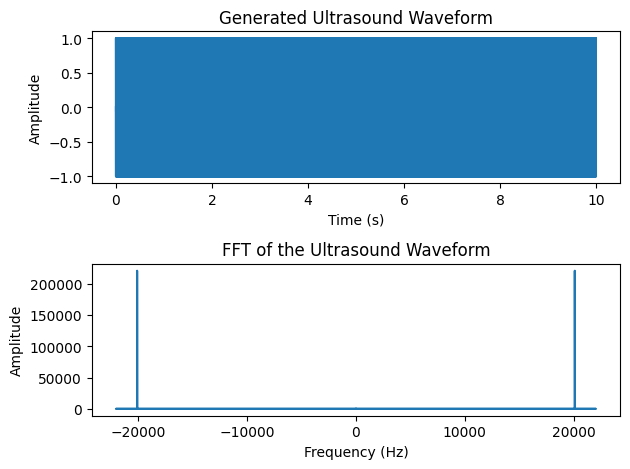

In [ ]:
# Usage example
audio_file_path = "/content/drive/MyDrive/xeno.wav"  # Download any audio file on Colab and add the path here

detect_bird(audio_file_path)